In [36]:
import numpy as np
import sympy as sp
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt

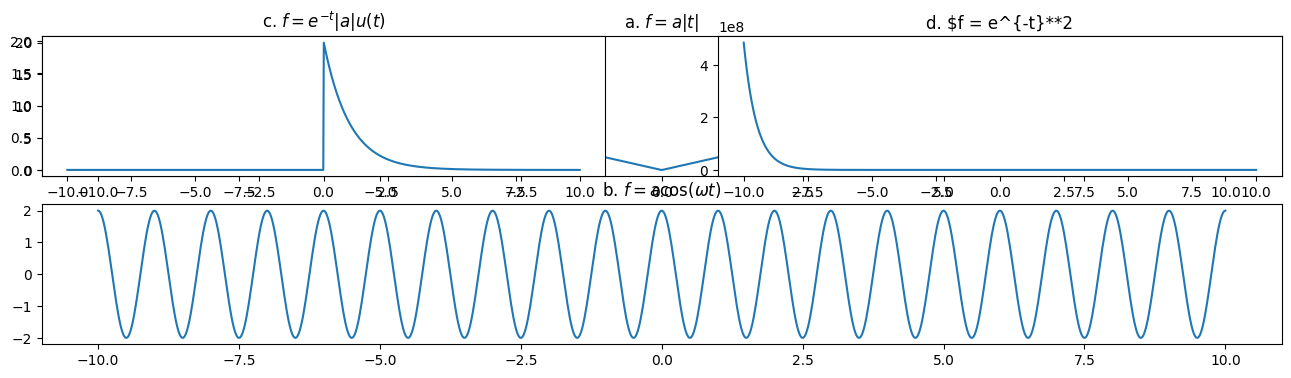

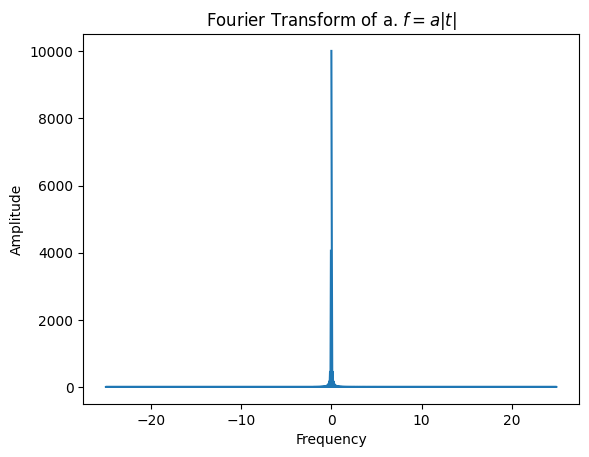

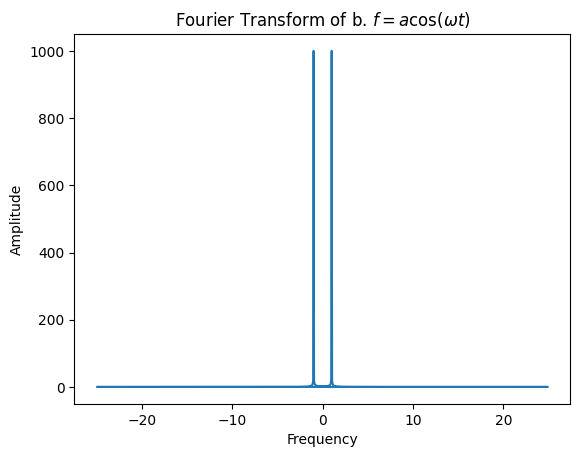

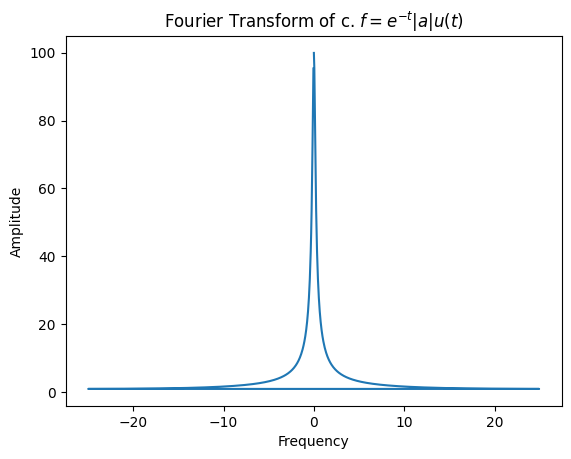

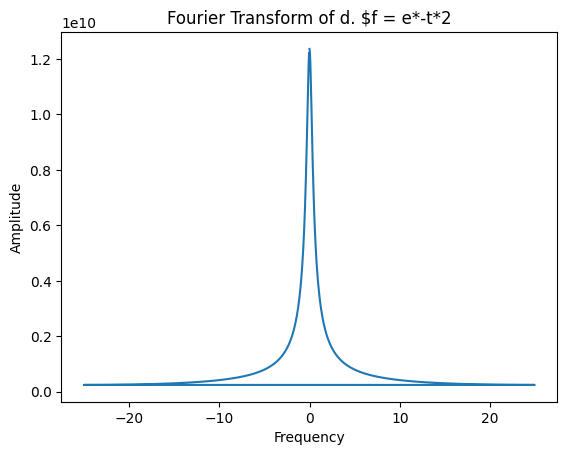

In [37]:
def func_a(t, a):
    return a * np.abs(t)

def func_b(t, a, omega):
    return a * np.cos(omega * t)

def func_c(t, a):
    return np.exp(-t) * np.abs(a) * np.heaviside(t, 1)

def func_d(t):
    return np.exp(-t)**2

t = np.linspace(-10, 10, 1000)

a = 2
omega = 2 * np.pi

y_a = func_a(t, a)
y_b = func_b(t, a, omega)
y_c = func_c(t, a)
y_d =func_d(t,a)

plt.figure(figsize=(16, 4))
plt.subplot(2,1,1)
plt.plot(t, y_a)
plt.title('a. $f = a|t|$')
plt.subplot(2,1,2)
plt.plot(t, y_b)
plt.title('b. $f = a \\cos(\\omega t)$')
plt.subplot(2,2,1)
plt.plot(t, y_c)
plt.title('c. $f = e^{-t}|a|u(t)$')
plt.subplot(2,2,2)
plt.plot(t, y_d)
plt.title('d. $f = e^{-t}**2')
plt.show()

# Calculate and plot Fourier transform
def plot_fourier_transform(y, t, title):
    fft_result = fft(y)
    freq = np.fft.fftfreq(len(t), t[1] - t[0])

    plt.figure()
    plt.plot(freq, np.abs(fft_result))
    plt.title(f'Fourier Transform of {title}')
    plt.xlabel('Frequency')
    plt.ylabel('Amplitude')
    plt.show()

# Plot Fourier transform for each function
plot_fourier_transform(y_a, t, 'a. $f = a|t|$')
plot_fourier_transform(y_b, t, 'b. $f = a \\cos(\\omega t)$')
plot_fourier_transform(y_c, t, 'c. $f = e^{-t}|a|u(t)$')
plot_fourier_transform(y_d, t, 'd. $f = e*-t*2')

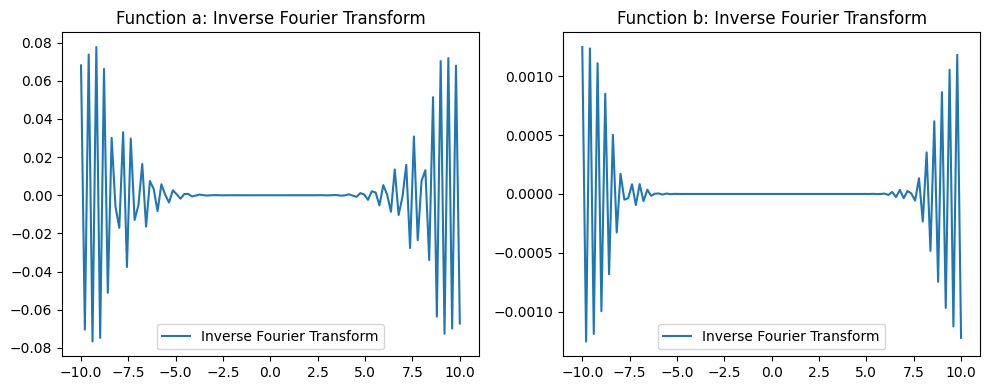

In [41]:
def inverse_fourier_transform(F, omega, t):
    return ifft(F(omega) * np.exp(1j * omega * t)).real

def F_a(omega):
    return np.exp(-omega**2/4)

def F_b(omega, a):
    return np.exp(-omega**2 - a**2)

t_values = np.linspace(-10, 10, 100)

f_values_a = inverse_fourier_transform(F_a, t_values, t_values)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(t_values, f_values_a, label='Inverse Fourier Transform')
plt.title('Function a: Inverse Fourier Transform')
plt.legend()

a_value = 2 
f_values_b = inverse_fourier_transform(lambda omega: F_b(omega, a_value), t_values, t_values)
plt.subplot(1, 2, 2)
plt.plot(t_values, f_values_b, label='Inverse Fourier Transform')
plt.title('Function b: Inverse Fourier Transform')
plt.legend()

plt.tight_layout()
plt.show()